In [1]:
import sys
sys.path.append("../src/")
sys.path.append("../src/AtomicH")

In [2]:

import dipolelosses
import potentials
import constants
import numpy as np
import pylab as plt
from dipolelosses import DipoleChannels

In [8]:
B_values = np.logspace(-3,100,50)

pot      = potentials.Silvera_Triplet
T_values = np.logspace(-3,2,50)
B_value  = 1e-5
GVsB_PW_H=[]

PWaves=[[0,2],
        [2,0],
        [2,2],
        [2,4],
        [4,2],
        [4,4],
        [4,6]]

degeneracies1 = [1,
                1,
                3,
                5,
                5,
                5,
                5]


c=DipoleChannels[0]
for PW in PWaves:
    Gs=[]
    for T in T_values:
        Gs.append(dipolelosses.GetGFactor(c,  B_value, constants.HydrogenConstants, T, pot,rhos=np.linspace(1e-9,0.75,2000),lin=PW[0],lout=PW[1]))
    GVsB_PW_H.append(np.array(Gs))





In [4]:
SummedG=[]
for T in T_values:
    SummedG.append(dipolelosses.GetSummedGFactor(c, B_value, constants.HydrogenConstants, T, pot,rhos=np.linspace(1e-9,0.75,2000)))
SummedG=np.array(SummedG)

In [5]:
amu=1.672621925e-27
A = 1e-6 / (constants.BohrInAng*1e-10)**2 * np.sqrt(amu/(4*constants.kb))

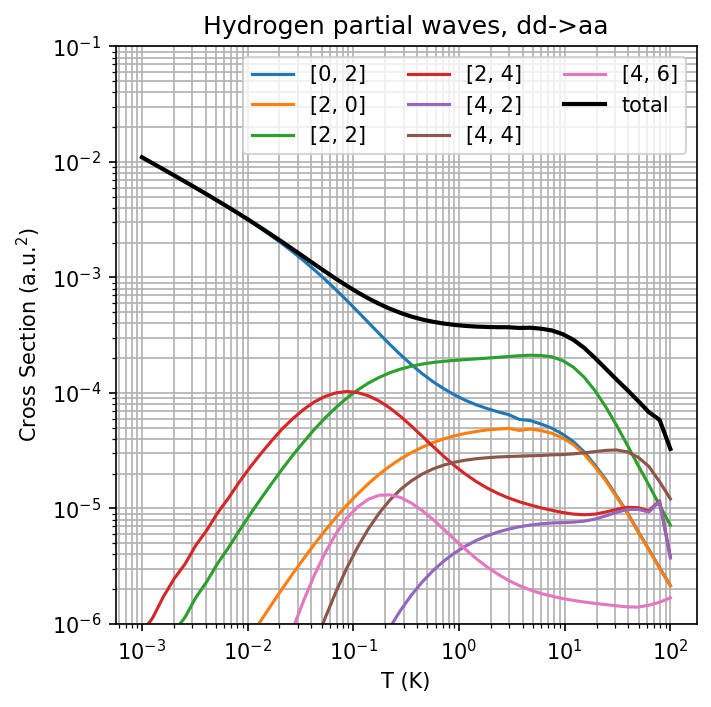

In [11]:

plt.figure(figsize=(5,5),dpi=150)
for iPW in range(0,len(PWaves)):
    plt.plot(T_values,A*GVsB_PW_H[iPW]*degeneracies1[iPW]/np.sqrt(T_values),label=str(PWaves[iPW]))
plt.plot(T_values, A*SummedG/np.sqrt(T_values),linewidth=2,color='black',label='total')
plt.semilogy()
plt.xlabel("T (K)")
#plt.xlim(0.001, 10)
plt.ylabel(r'Cross Section (a.u.$^2$)')
#plt.ylim(1e-19, 1e-15)
plt.title("Hydrogen partial waves, dd->aa")
plt.grid(which='both')
plt.legend(ncol=3)
plt.loglog()
plt.ylim(1e-6,1e-1)

plt.show()

In [13]:

degeneracies2 = [1,
                1,
                1,
                1,
                1,
                1,
                1]

degeneracies3 = [1,
                0,
                0,
                0,
                0,
                0,
                0]

SumPW1=np.zeros_like(GVsB_PW_H[0])
SumPW2=np.zeros_like(GVsB_PW_H[0])
SumPW3=np.zeros_like(GVsB_PW_H[0])

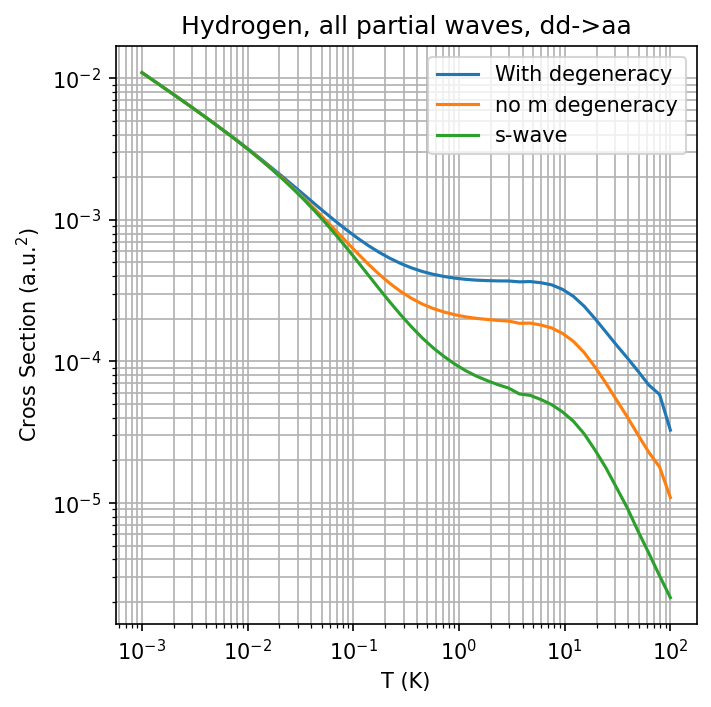

In [14]:
SumPW1=np.zeros_like(GVsB_PW_H[0])
SumPW2=np.zeros_like(GVsB_PW_H[0])
SumPW3=np.zeros_like(GVsB_PW_H[0])
for iPW in range(0,len(PWaves)):
    SumPW1+=GVsB_PW_H[iPW]*degeneracies1[iPW]
    SumPW2+=GVsB_PW_H[iPW]*degeneracies2[iPW]
    SumPW3+=GVsB_PW_H[iPW]*degeneracies3[iPW]
plt.figure(figsize=(5,5),dpi=150)
plt.plot(T_values,A*SumPW1/np.sqrt(T_values),label='With degeneracy')
plt.plot(T_values,A*SumPW2/np.sqrt(T_values),label='no m degeneracy')
plt.plot(T_values,A*SumPW3/np.sqrt(T_values),label='s-wave')

plt.semilogy()
plt.xlabel("T (K)")
#plt.xlim(0.001, 10)
plt.ylabel(r'Cross Section (a.u.$^2$)')
#plt.ylim(1e-19, 1e-15)
plt.title("Hydrogen, all partial waves, dd->aa")
plt.grid(which='both') #
plt.legend()
plt.loglog()
plt.show()